# UFV QC 00 Lab - Introduction to Qiskit

### Objective
The objective of this lab is to get used to using Jupyter Notebooks and Qiskit

We will see how to:

1. Create a notebook in the IBM Quantum Lab
2. The notion of a Circuit
3. How to apply Gates
4. How to run circuits with Samplers and Estimators
5. Result visualization

### 1. First, we need to define a quantum circuit

There are two ways of creating Quantum Circuits:
1. The explanatory way, which allows us to name our Qubits and Bits
2. The simplified way 

In [1]:
# First things first, lets import the required libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [2]:
# Explanatory way

qubit = QuantumRegister(1, "Qubit") # Preparing a Qubit for our circuit
bit = ClassicalRegister(1, "Bit") # Preparing a Bit for our circuit

# We join them both into a single circuit
sample_circuit = QuantumCircuit(qubit, bit)

In [3]:
# Simplified Way

simplified_sample_circuit = QuantumCircuit(1, 1) # Here we represent that we want one Qubit and one Bit

These two ways of defining a circuit do exactly the same in the end.

Let's now display a representation of these circuits to compare them

In [4]:
display(sample_circuit.draw())
display(simplified_sample_circuit.draw())

Qubit: 
       
Bit: 1/

q: 
     
c: 1/

/home/user/Sync/Repositories/Teaching/quantum_venv/lib64/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


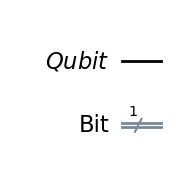

In [5]:
# We can also display it graphically
sample_circuit.draw('mpl')

### 3. Applying basic gates on the circuit

To do so we can do it in multiple ways:
1. We can target the qubit by its index
2. We can target the qubit with the variable we created previously 

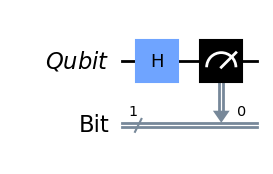

In [6]:
# Let's apply a Hadamard Gate in the normal way
sample_circuit.h(qubit)
sample_circuit.measure(qubit, bit)

sample_circuit.draw('mpl')

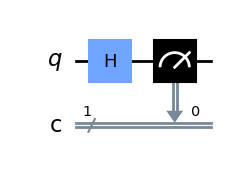

In [7]:
# Or we can do the same in the simplified version
# Let's apply a Hadamard Gate in the normal way
simplified_sample_circuit.h(0)
simplified_sample_circuit.measure(0, 0)

simplified_sample_circuit.draw('mpl')

### 4. We can now run this circuit with the Qiskit Primitives 

The primitives represent the two kinds of data we can extract from running quantum circuits:
- Expectation values (**Estimator**)
- Statistical distributions of results (**Sampler**)

### As explained in the Qiskit Docs

#### Estimator
> The Estimator primitive computes expectation values of observables with respect to states prepared by quantum circuits. The Estimator receives circuit-observable pairs (with the observable expressed as a weighted sum of Pauli operators) as inputs, and returns the computed expectation values per pair, as well as their variances. Different Estimator implementations support various configuration options. The circuits can be parametrized, as long as the parameter values are also provided as input to the primitive.

#### Sampler
>The Sampler primitive samples from the classical output registers resulting from execution of quantum circuits. For this reason, the inputs to the Sampler are (parametrized) quantum circuits, for which it returns the corresponding quasi-probability distributions of sampled bitstrings. Quasi-probability distributions are similar to regular probabilities, except they may include negative values, which can occur when using certain error mitigation techniques.

**For now, we will only be using the Sampler function, which gives us a distribution of the results obtained from the circuit**

In [ ]:
# As always the first step is to import the required libraries
# from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Batch
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Sampler, Session

In [ ]:
# Then we must initialize the Qiskit Runtime Service

## If we are using the IBM Quantum Lab we can just do the following:
service = QiskitRuntimeService()

## Else we must complicate it a bit
# service = QiskitRuntimeService(
#     channel='ibm_quantum',
#     instance='ibm-q/open/main',
#     token='YOUR API TOKEN, GET IT FROM THE TOP RIGHT CORNER IN quantum.ibm.com'
# )

In [ ]:
# In order to execute a job, we need to select a backend [https://quantum.ibm.com/services/resources]
## We can choose a real quantum computer 
# backend_real = service.backend("ibm_brisbane")

## Or a simulator. In this case we will run the circuit in a simulator:
backend_simulator = service.get_backend('ibmq_qasm_simulator')

#### Executing using an Estimator

In [ ]:
from qiskit.quantum_info import SparsePauliOp # We will see this later on in the course

observable = SparsePauliOp(['Z']) # This represents measuring the expectation value in the Z Axis

with Session(service=service, backend=backend_simulator) as session:
    estimator = Estimator(session=session)
    job = estimator.run(circuits=sample_circuit, observables=observable)
    print(job.result())

#### Executing using a Sampler

In [ ]:
# We can now execute our program using a Sampler Primitive

with Session(service=service, backend=backend_simulator) as session:
    estimator = Sampler(session=session)
    job = estimator.run(circuits=sample_circuit)
    print(job.result())

#### To visualize results we can use the visualization functions

In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram(job.result().quasi_dists[0])